<a href="https://colab.research.google.com/github/NayeonKeum/ToyProjects/blob/master/Drop_out_of_college_VS_set_up_a_cafe%3F/%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import pandas as pd
import numpy as np
import re

# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

from plotnine import *
import plotnine

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [113]:
import pandas as pd

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/인허가_식품+면적+영업기간.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
data.head()

,개방자치단체코드,년도,인허가일자,폐업일자,영업상태코드,영업상태명,사업장명,자치구명,행정동명,좌표정보(X),좌표정보(Y),시설총규모,총층수(실),업소위치(실),규모분기,영업기간(실),인허가분기,폐업분기,업소위치,총층수,영업기간분기
0,3000000,1964.0,1964-12-03,1992-06-18,2,폐업,청수,종로구,종로1.2.3.4가동,NaN,NaN,2.40,NaN,NaN,1,10059,4,2,지상,1,10.0
1,3000000,1965.0,1965-10-30,1994-12-01,2,폐업,태을,종로구,종로1.2.3.4가동,198432.4972,452113.6709,56.62,NaN,NaN,6,10624,4,4,지상,1,10.0
2,3000000,1965.0,1965-10-10,2012-03-23,2,폐업,봉다방,종로구,창신제1동,201040.5626,452226.7999,58.30,2.0,NaN,6,16966,4,1,지상,2,10.0
3,3000000,1965.0,1965-12-23,1996-04-30,2,폐업,길,종로구,창신제2동,200811.9254,452162.5695,119.72,NaN,NaN,9,11086,4,2,지상,1,10.0
4,3000000,1966.0,1966-10-14,1993-08-04,2,폐업,장미,종로구,종로1.2.3.4가동,199333.5634,451884.6044,76.12,NaN,NaN,7,9791,4,3,지상,1,10.0


In [46]:
data.shape

(47776, 21)

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47776 entries, 0 to 47775
Data columns (total 22 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방자치단체코드  47776 non-null  int64  
 1   년도        47446 non-null  float64
 2   인허가일자     47776 non-null  object 
 3   폐업일자      47776 non-null  object 
 4   영업상태코드    47776 non-null  int64  
 5   영업상태명     47776 non-null  object 
 6   사업장명      40744 non-null  object 
 7   자치구명      42071 non-null  object 
 8   행정동명      47308 non-null  object 
 9   좌표정보(X)   45665 non-null  float64
 10  좌표정보(Y)   45665 non-null  float64
 11  시설총규모     47776 non-null  float64
 12  총층수(실)    9356 non-null   float64
 13  업소위치(실)   33098 non-null  object 
 14  규모분기      47776 non-null  int64  
 15  영업기간(실)   47776 non-null  int64  
 16  인허가분기     47776 non-null  object 
 17  폐업분기      47776 non-null  int64  
 18  업소위치      47776 non-null  object 
 19  총층수       47776 non-null  int64  
 20  영업기간분기    47591 non-null  fl

In [115]:
data.isnull().sum()

개방자치단체코드        0
년도            330
인허가일자           0
폐업일자            0
영업상태코드          0
영업상태명           0
사업장명         7032
자치구명         5705
행정동명          468
좌표정보(X)      2111
좌표정보(Y)      2111
시설총규모           0
총층수(실)      38420
업소위치(실)     14678
규모분기            0
영업기간(실)         0
인허가분기           0
폐업분기            0
업소위치            0
총층수             0
영업기간분기        185
총층수(1제외)    39798
dtype: int64

In [49]:
%matplotlib inline
import seaborn as sns
sns.set()

In [50]:
def bar_charty(feature):
  Survived=data[data['영업상태명']=='영업'][feature].value_counts()
  Dead=data[data['영업상태명']=='폐업'][feature].value_counts()
  df=pd.DataFrame([Survived,Dead])
  df.index=['Survived',"Dead"]
  df.plot(kind='bar',stacked=True, figsize=(10,5))

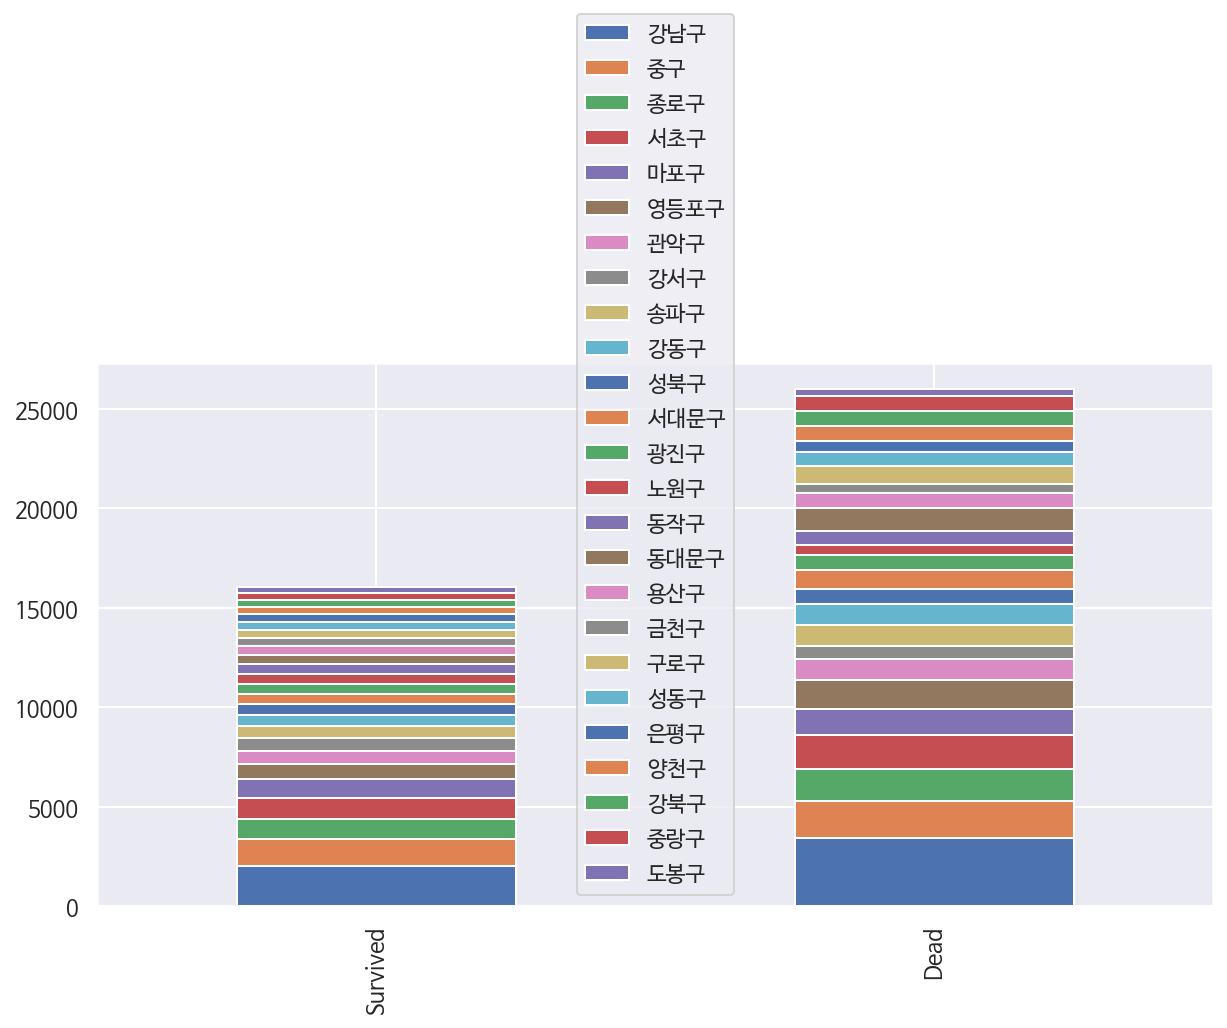

In [53]:
bar_charty('자치구명')

In [70]:
#bar_charty('행정동명')

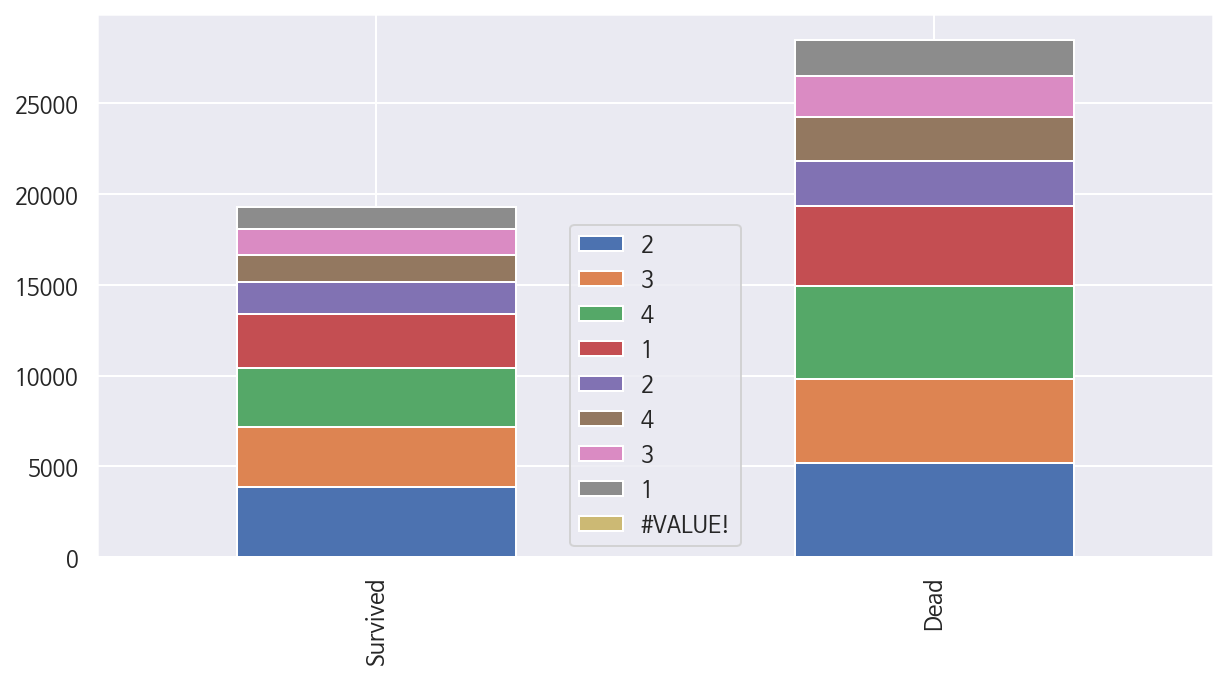

In [54]:
bar_charty('인허가분기')

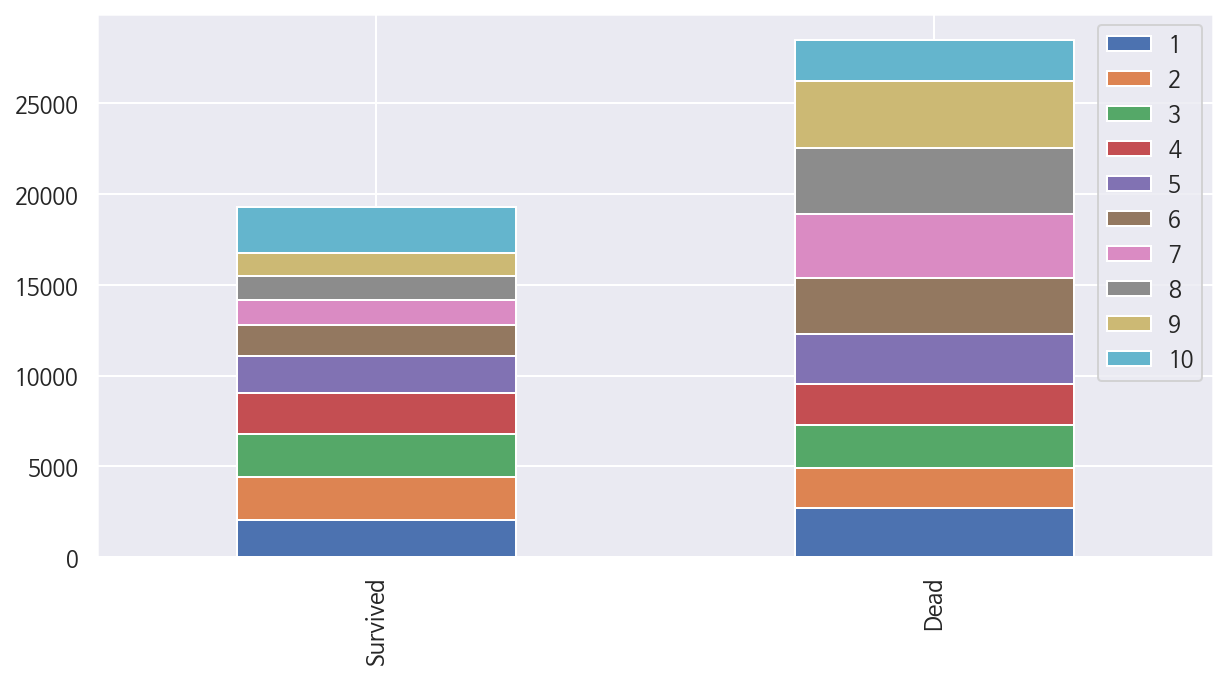

In [55]:
bar_charty('규모분기')

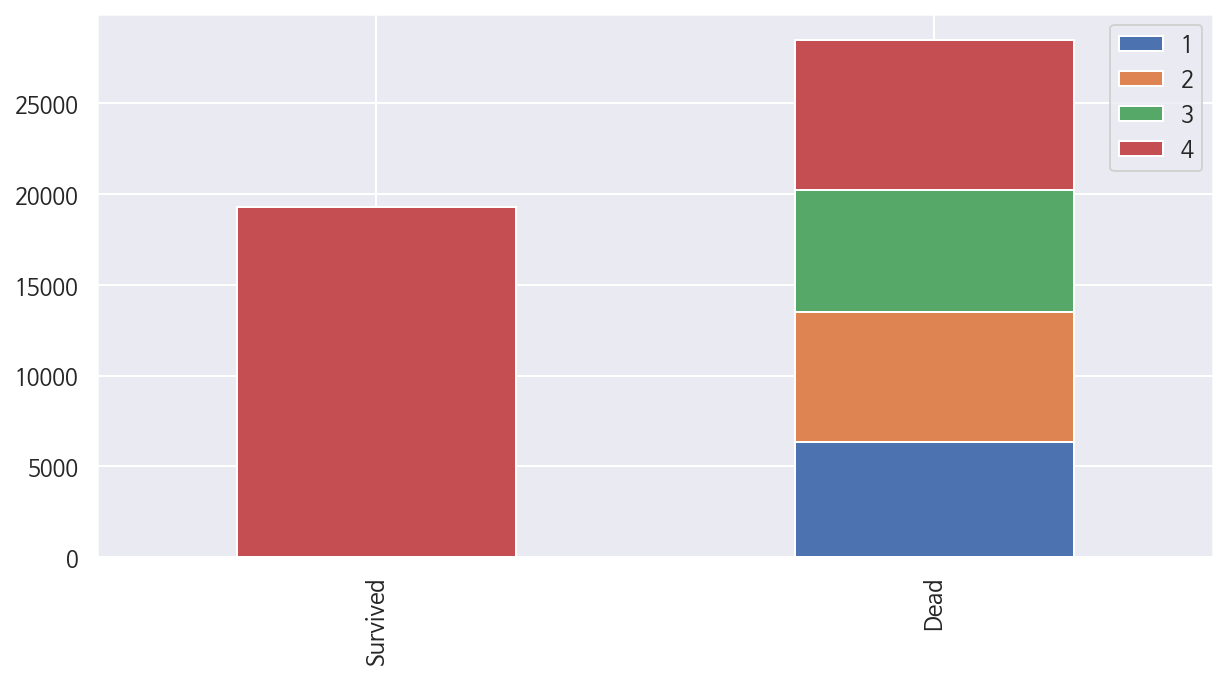

In [56]:
bar_charty('폐업분기')

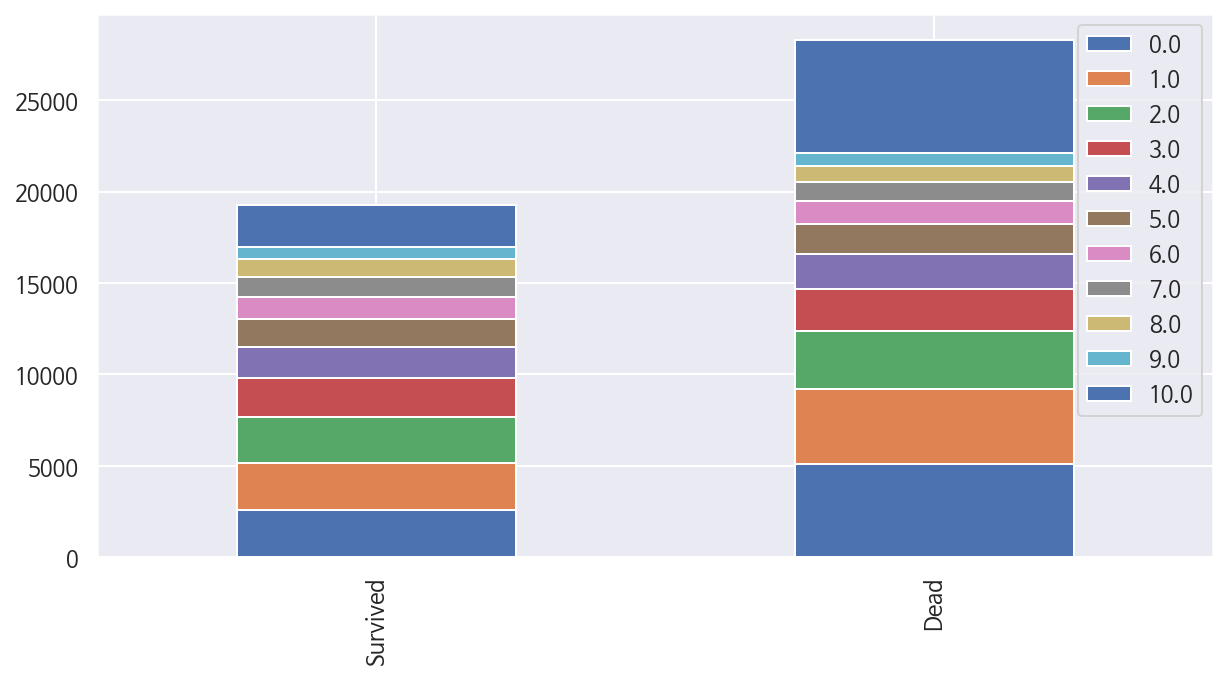

In [57]:
bar_charty('영업기간분기')

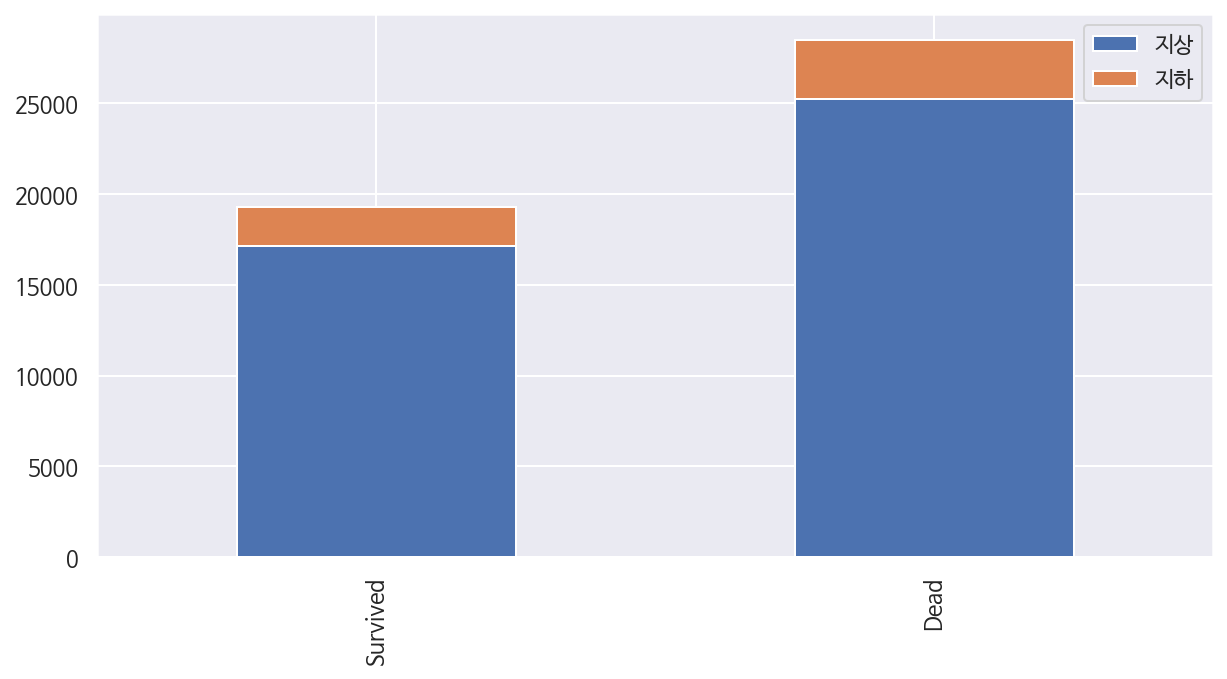

In [58]:
bar_charty('업소위치')

In [66]:
'''
count=0
for n in data['총층수']:
  if n==1 or n=="1":
    count+=1
  else:
    data['총층수(1제외)']=data['총층수']
print("1층의 개수 : ",count)
''.

1층의 개수 :  39798


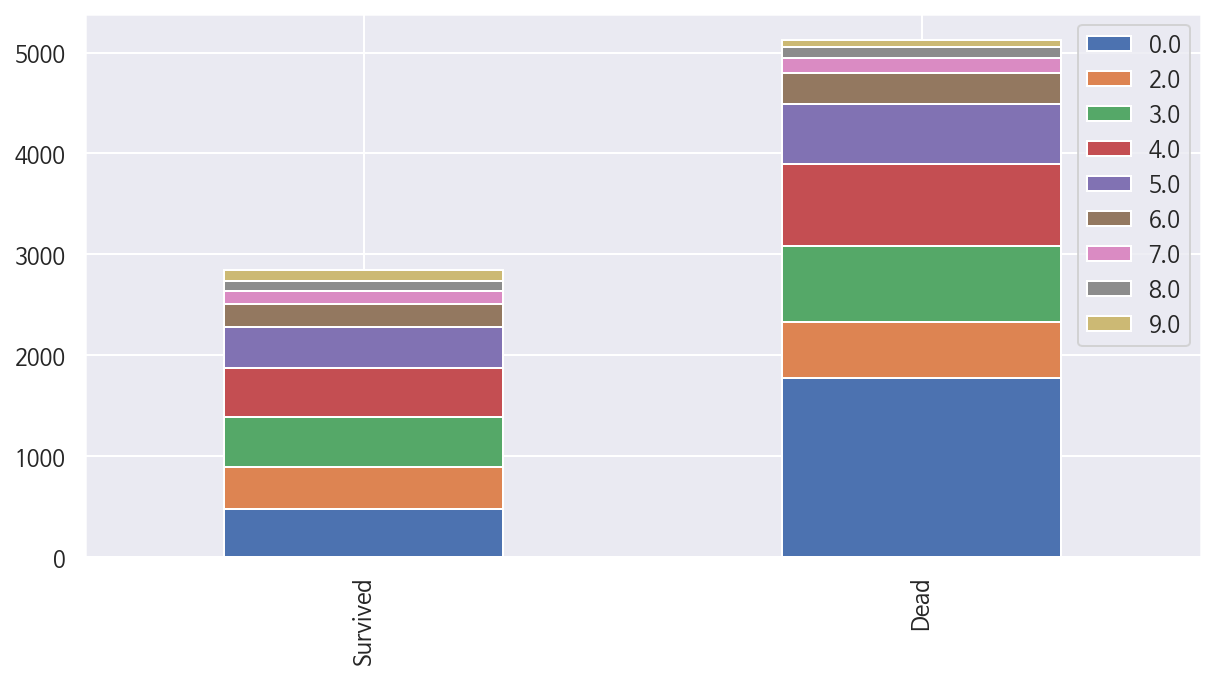

In [69]:
bar_charty('총층수(1제외)')

In [138]:
floor_mapping={"지상":1, "지하":0}
data['층_01']=data['업소위치'].map(floor_mapping)
gu_mapping={"강남구":1, "중구":2, "종로구":3, '서초구':4,'마포구':5,'영등포구':6,'관악구':7,'강서구':8,'송파구':9,'강동구':10,'성북구':11,'서대문구':12,'광진구':13,'노원구':14,'동작구':15,'동대문구':16,'용산구':17,'금천구':18,'구로구':19,'성동구':20,'은평구':21,'양천구':22,'강북구':23,'중랑구':24,'도봉구':25}
data['구_1_25']=data['자치구명'].map(gu_mapping)

In [139]:
#시설총규모 채우기 중앙값으로
#int 안됨 data['년도'].fillna(data.groupby("개방자치단체코드")['년도'].transform(2020), inplace=True)
#data['시설총규모'].fillna(data.groupby("행정동명")['시설총규모'].transform("median"), inplace=True)
data.head()

,년도,영업상태코드,사업장명,자치구명,행정동명,시설총규모,규모분기,인허가분기,폐업분기,업소위치,총층수,영업기간분기,층_01,구_1_25
0,1964.0,2,청수,종로구,종로1.2.3.4가동,2.40,1,4,2,지상,1,10.0,1,3.0
1,1965.0,2,태을,종로구,종로1.2.3.4가동,56.62,6,4,4,지상,1,10.0,1,3.0
2,1965.0,2,봉다방,종로구,창신제1동,58.30,6,4,1,지상,2,10.0,1,3.0
3,1965.0,2,길,종로구,창신제2동,119.72,9,4,2,지상,1,10.0,1,3.0
4,1966.0,2,장미,종로구,종로1.2.3.4가동,76.12,7,4,3,지상,1,10.0,1,3.0


In [117]:
#시설총규모 채우기 평균으로 채우기
data['좌표정보(X)'].fillna(data.groupby("행정동명")['좌표정보(X)'].transform("mean"), inplace=True)
data['좌표정보(Y)'].fillna(data.groupby("행정동명")['좌표정보(Y)'].transform("mean"), inplace=True)
#영업기간분기 채우기 중앙값, 행정동명으로
data['영업기간분기'].fillna(data.groupby("행정동명")['영업기간분기'].transform("median"), inplace=True)

In [118]:
data.isnull().sum()

개방자치단체코드        0
년도            330
인허가일자           0
폐업일자            0
영업상태코드          0
영업상태명           0
사업장명         7032
자치구명         5705
행정동명          468
좌표정보(X)        20
좌표정보(Y)        20
시설총규모           0
총층수(실)      38420
업소위치(실)     14678
규모분기            0
영업기간(실)         0
인허가분기           0
폐업분기            0
업소위치            0
총층수             0
영업기간분기          2
총층수(1제외)    39798
층_01            0
dtype: int64

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


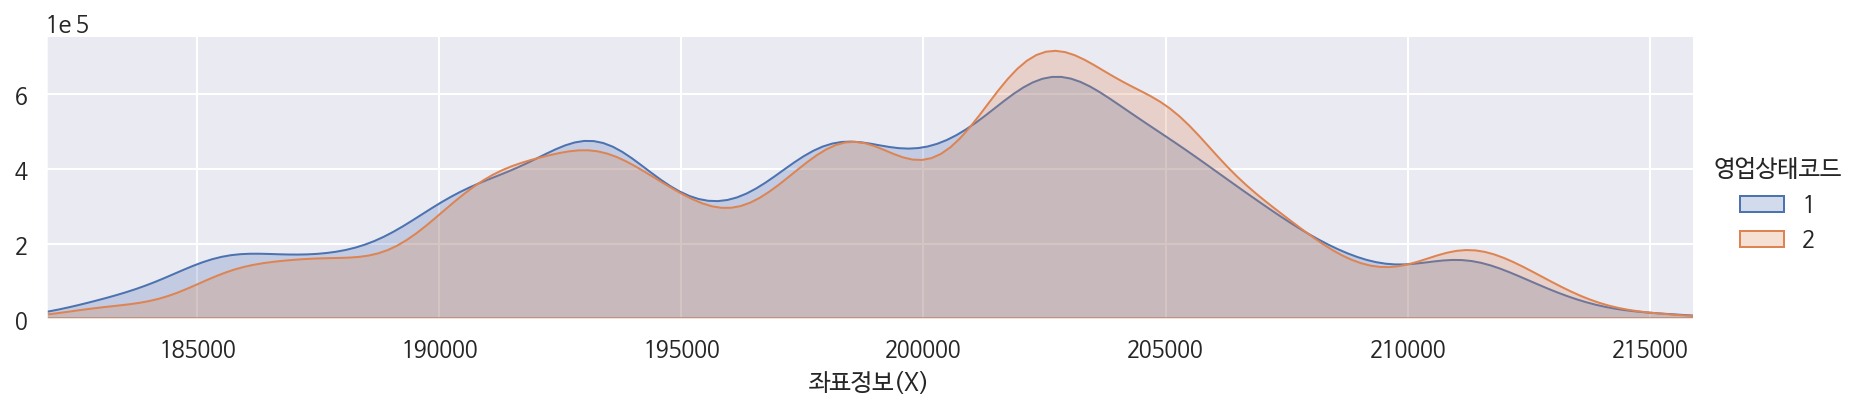

In [119]:
facet=sns.FacetGrid(data, hue="영업상태코드", aspect=4)
facet.map(sns.kdeplot, '좌표정보(X)',shade=True)
facet.set(xlim=(data['좌표정보(X)'].min(),data['좌표정보(X)'].max()))
facet.add_legend() 

import matplotlib.pyplot as plt
plt.show()
#1영업, 2폐업

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


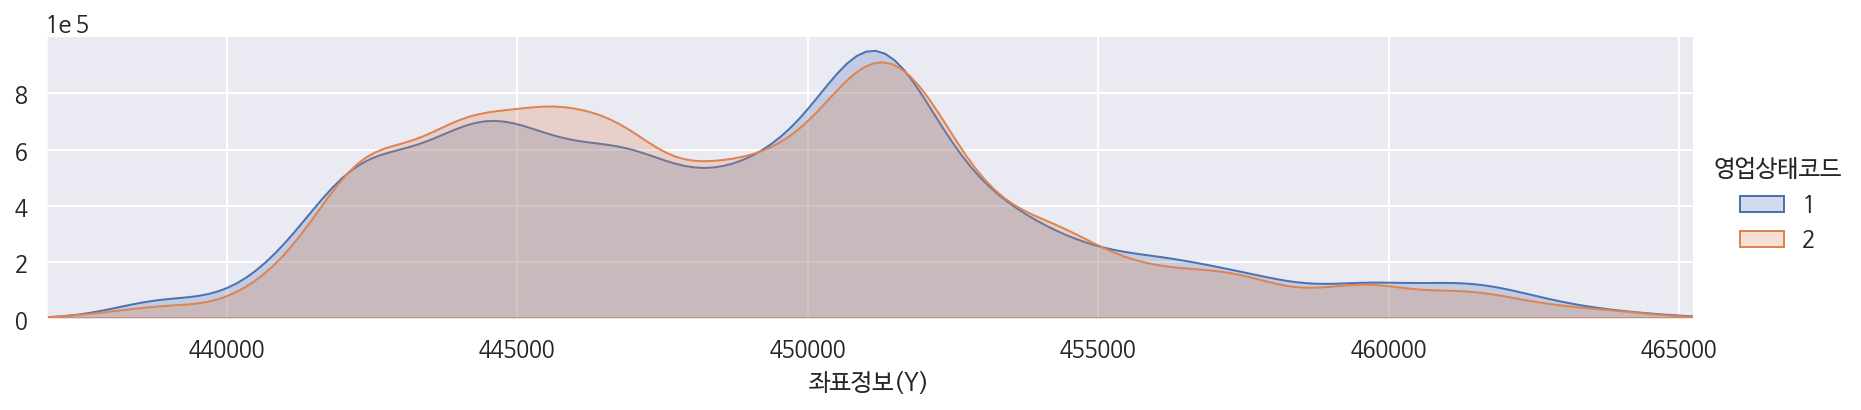

In [120]:
facet=sns.FacetGrid(data, hue="영업상태코드", aspect=4)
facet.map(sns.kdeplot, '좌표정보(Y)',shade=True)
facet.set(xlim=(data['좌표정보(Y)'].min(),data['좌표정보(Y)'].max()))
facet.add_legend()

import matplotlib.pyplot as plt
plt.show()

In [122]:
#년도 빈거 2020으로!
data["년도"]=data["년도"].fillna(2020)
#영업기간분기 빈거 2개,좌표정보 이상한거 20개 삭제를 하려고 햇는데 코드가 안 먹어서 일단 보류
''' 
data.dropna(subset=['영업기간분기'])
data.dropna(subset=['좌표정보(X)'])
data.isnull().sum()
...

개방자치단체코드        0
년도              0
인허가일자           0
폐업일자            0
영업상태코드          0
영업상태명           0
사업장명         7032
자치구명         5705
행정동명          468
좌표정보(X)        20
좌표정보(Y)        20
시설총규모           0
총층수(실)      38420
업소위치(실)     14678
규모분기            0
영업기간(실)         0
인허가분기           0
폐업분기            0
업소위치            0
총층수             0
영업기간분기          2
총층수(1제외)    39798
층_01            0
dtype: int64

In [123]:
data.head()


,개방자치단체코드,년도,인허가일자,폐업일자,영업상태코드,영업상태명,사업장명,자치구명,행정동명,좌표정보(X),좌표정보(Y),시설총규모,총층수(실),업소위치(실),규모분기,영업기간(실),인허가분기,폐업분기,업소위치,총층수,영업기간분기,총층수(1제외),층_01
0,3000000,1964.0,1964-12-03,1992-06-18,2,폐업,청수,종로구,종로1.2.3.4가동,198743.843357,452139.007569,2.40,NaN,NaN,1,10059,4,2,지상,1,10.0,NaN,1
1,3000000,1965.0,1965-10-30,1994-12-01,2,폐업,태을,종로구,종로1.2.3.4가동,198432.497200,452113.670900,56.62,NaN,NaN,6,10624,4,4,지상,1,10.0,NaN,1
2,3000000,1965.0,1965-10-10,2012-03-23,2,폐업,봉다방,종로구,창신제1동,201040.562600,452226.799900,58.30,2.0,NaN,6,16966,4,1,지상,2,10.0,2.0,1
3,3000000,1965.0,1965-12-23,1996-04-30,2,폐업,길,종로구,창신제2동,200811.925400,452162.569500,119.72,NaN,NaN,9,11086,4,2,지상,1,10.0,NaN,1
4,3000000,1966.0,1966-10-14,1993-08-04,2,폐업,장미,종로구,종로1.2.3.4가동,199333.563400,451884.604400,76.12,NaN,NaN,7,9791,4,3,지상,1,10.0,NaN,1


In [161]:
#년도에 너무 비중이 크니까-1960
data['년도']=(data['년도']-1960)

In [162]:
#노쓸모 드랍
feat_drop=['개방자치단체코드', '사업장명'(?),'자치구명','행정동명','업소위치','시설총규모','좌표정보(Y)','좌표정보(X)','인허가일자','폐업일자','영업상태명','총층수(실)', '업소위치(실)','영업기간(실)','총층수(1제외)']
data=data.drop(feat_drop, axis=1)

train=data[:33443]
test=data[33444:]
train=train.drop(['사업장명'], axis=1)

In [163]:
train_data=train.drop('영업상태코드',axis=1)
train_data.shape, target.shape

((33443, 8), (33443,))

In [168]:
train_data.head()

,년도,규모분기,인허가분기,폐업분기,총층수,영업기간분기,층_01,구_1_25
0,4.0,1,4,2,1,10.0,1,3.0
1,5.0,6,4,4,1,10.0,1,3.0
2,5.0,6,4,1,2,10.0,1,3.0
3,5.0,9,4,2,1,10.0,1,3.0
4,6.0,7,4,3,1,10.0,1,3.0


In [169]:
test.head()

,년도,영업상태코드,사업장명,규모분기,인허가분기,폐업분기,총층수,영업기간분기,층_01,구_1_25
33444,25.0,2,옥,6,2,2,1,10.0,1,7.0
33445,25.0,2,미성,9,4,1,1,10.0,1,7.0
33446,25.0,2,타임,9,1,4,1,4.0,1,7.0
33447,25.0,2,옥수,9,1,3,1,10.0,1,7.0
33448,25.0,2,한성,8,2,4,1,6.0,1,7.0


In [170]:
test.to_csv("/content/drive/My Drive/Colab Notebooks/data/test_inheo.csv")
train_data.to_csv("/content/drive/My Drive/Colab Notebooks/data/train_data_inheo.csv")

In [171]:
train.to_csv("/content/drive/My Drive/Colab Notebooks/data/train_inheo.csv")